## PCA 정리

- 비지도 학습 사용 이유 : 시각화, 데이터 압축, 지도학습을 위함
- 주성분 분석은 특성들이 통계적으로 상관관계가 없도록 데이터셋을 회전시키는 기술
- 회전한 뒤에 데이터를 설명하는데 얼마나 중요하냐에 따라 종종 새로운 특성 중 일부만 선택 됨.
- 주 방향을 설정한다. 주 방향은 분산이 큰 방향으로 설정
    - 분산이 크다 = 가장 많은 정보를 담고 있다 = 상관 관계가 크다.
- 주 방향을 설정 한 후에 주방향과 직각인 방향 중 가장 많은 정보를 담은 방향을 찾는다.
    - 2차원에서는 방향이 하나 뿐이지만 고차원 일 수록 무한히 많은 방향이 있을 수 있다
- PCA는 주성분의 일부만 남기는 차원 축소 용도로 사용이 가능하다.
- 가장 널리 사용되는 분야는 고차원 데이터 셋의 시각화

## PCA 궁금한거 
- 이거 왜쓰냐
- 주성분으로 추린다는게 비빔밥처럼 몇개의 임의의 특성을 생성해서 만드는 것인가
- 작동 원리는?

1. 임포트 하기
    - from sklearn,decomposition import PCA
    - from sklearn.model_selection import train_test.split

2. 모델 적용하기
    2.1 : 모델 나누기
    - X_train, X_test, y_train, y_test = train_test.split(X, y, randon_state = 42)
    
    2.2 : 모델 적용하기
    - pca = PCA(n_components = num)
        - n_components 값이 매개변수? 인듯. 몇개의 특성으로 만들 것인가를 결정함
    - pca.fit(X)
    - X_pca = pca.transform(X)
        - PCA 객체를 생성하고 fit 매서드를 호출해서 주성분을 찾고 transform 메서드를 호출해 데이터를 회전 시키고 차원을 축소해야함
        - 따라서 pca.fit 하고 난 후에 transform을 꼭 해줘야함.
3. 모델 평가하기
    3.1 주성분 확인하기
    - pca.components_
    

In [55]:
pca.components_.shape

(100, 5655)

In [61]:
y = X.reshape(5,2)

In [64]:
y

array([[ 0.98146144,  0.91623591],
       [ 0.85430991,  0.90658802],
       [ 0.28403285,  0.43248441],
       [ 0.86594625,  0.30607951],
       [ 0.80366528,  0.2749739 ]])

In [67]:
X = np.arange(12).reshape(4,3)

In [69]:
name = ['one', 'two', 'three']

([<matplotlib.axis.XTick at 0x1909a10d320>,
 <a list of 3 Text xticklabel objects>)

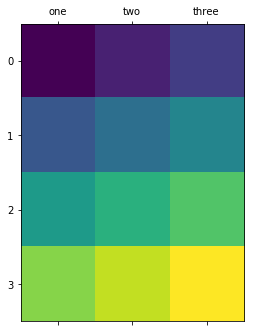

In [74]:
plt.matshow(X)
plt.xticks(range(3), name)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
import mglearn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [ ]:
mglearn.plots.plot_pca_illustration()

In [30]:
cancer = load_breast_cancer()

In [ ]:
np.histogram([1,2,1], bins = 30)

In [ ]:
plt.hist([1, 2, 1], bins=50) # 주어진 데이터의 거리(간격) 이라 생각하면 될듯 int값일 경우, 범위 값이면 사이의 edge값이고
#(array([0, 2, 1]), array([0, 1, 2, 3]), <a list of 3 Patch objects>)
plt.show()

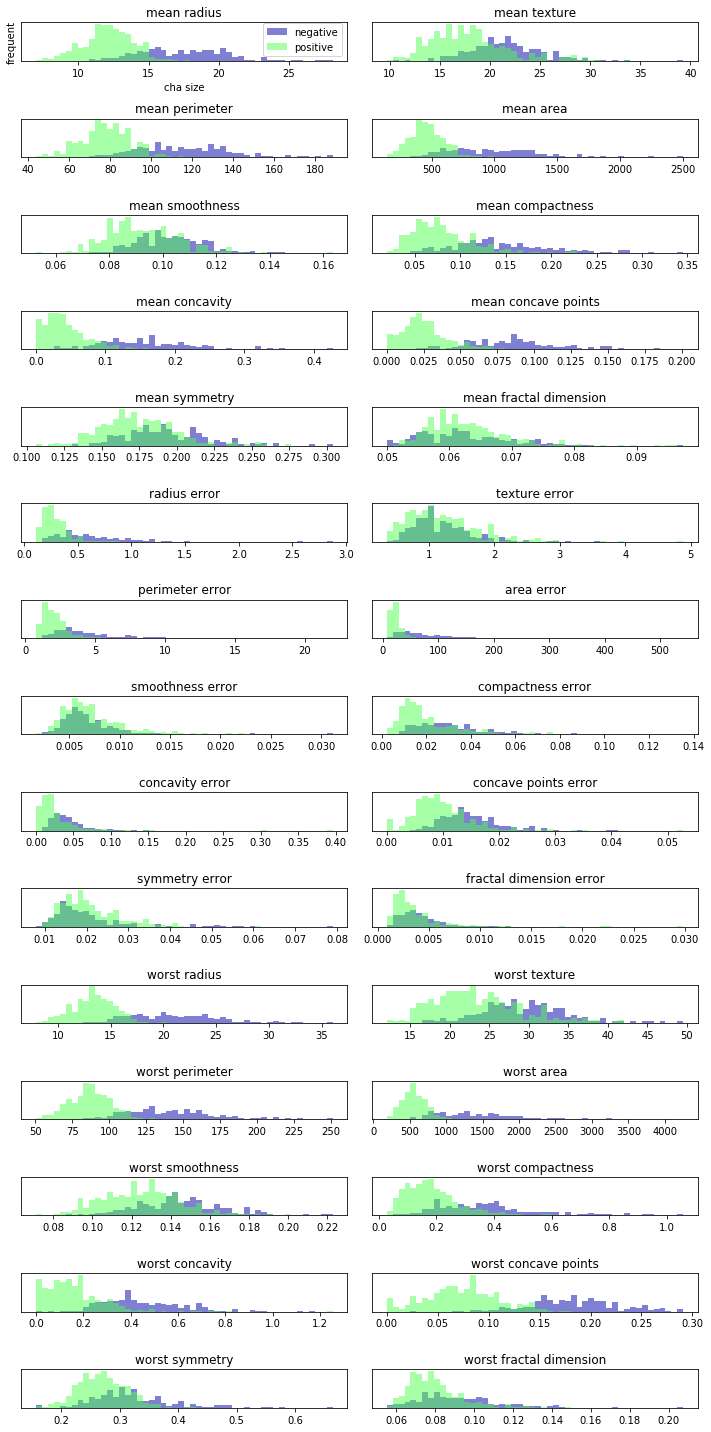

In [54]:
fig, axes = plt.subplots(15, 2, figsize = (10,20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins = 50)
    ax[i].hist(malignant[:, i], bins = bins , color = mglearn.cm3(0), alpha = .5)
    ax[i].hist(benign[:, i], bins = bins , color = mglearn.cm3(2), alpha = .5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(()) # y값이 나타내는 범위

ax[0].set_xlabel('cha size')
ax[0].set_ylabel('frequent')
ax[0].legend(['negative', 'positive'], loc = 'best')
fig.tight_layout()

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(cancer.data)

In [33]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)

print ('original {}'.format(str(X_scaled.shape)))
print ('changed {}'.format(str(X_pca.shape)))

original (569, 30)
changed (569, 2)


In [ ]:
plt.figure(figsize = (8,8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(['negative', 'positive'], loc ='best')
plt.gca().set_aspect('equal')
plt.xlabel('first principal')
plt.ylabel('second principal')

In [ ]:
print ('PCA principal :{}'.format(pca.components_.shape))


In [ ]:
print ('PCA principal :\n{}'.format(pca.components_))

In [ ]:
plt.matshow(pca.components_, cmap = 'viridis')
plt.yticks([0,1], ['first principal', 'second principal'])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation = 60)#, ha = 'left')
plt.xlabel('character')
plt.ylabel('principal')

In [1]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person = 20, resize = 0.7)
image_shape = people.images[0].shape

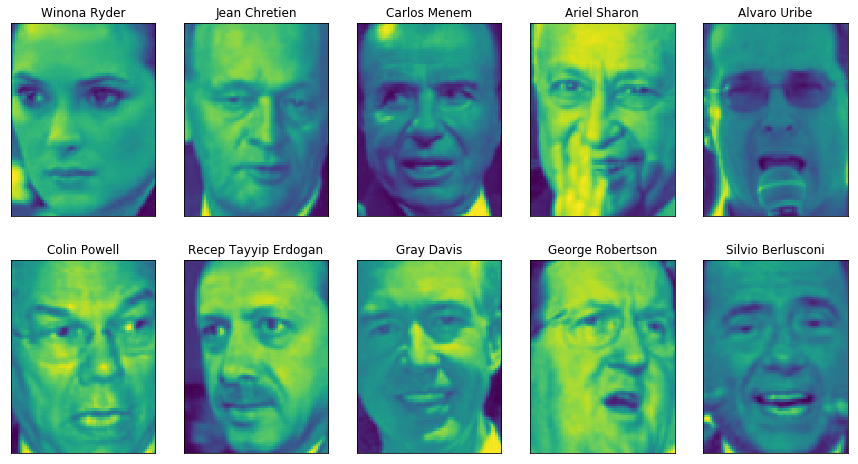

In [7]:
fig, axes = plt.subplots(2,5, figsize = (15,8),
                        subplot_kw = {'xticks': (), 'yticks' : ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [11]:
print ('people.images.shape :{}'.format(people.images.shape))
print ('count class {}'.format(len(people.target_names)))

people.images.shape :(3023, 87, 65)
count class 62


In [9]:
counts = np.bincount(people.target)

for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print ('{0:25} {1:3}'.format(name, count), end = '   ')
    if (i + 1) % 3 == 0:
        print ()

Alejandro Toledo           39   Alvaro Uribe               35   Amelie Mauresmo            21   
Andre Agassi               36   Angelina Jolie             20   Ariel Sharon               77   
Arnold Schwarzenegger      42   Atal Bihari Vajpayee       24   Bill Clinton               29   
Carlos Menem               21   Colin Powell              236   David Beckham              31   
Donald Rumsfeld           121   George Robertson           22   George W Bush             530   
Gerhard Schroeder         109   Gloria Macapagal Arroyo    44   Gray Davis                 26   
Guillermo Coria            30   Hamid Karzai               22   Hans Blix                  39   
Hugo Chavez                71   Igor Ivanov                20   Jack Straw                 28   
Jacques Chirac             52   Jean Chretien              55   Jennifer Aniston           21   
Jennifer Capriati          42   Jennifer Lopez             21   Jeremy Greenstock          24   
Jiang Zemin                20 

In [10]:
mask = np.zeros(people.target.shape, dtype = np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

X_people = X_people / 255.

In [22]:
for target in np.unique(people.target):
    print (mask[np.where(people.target == target)[0][:50]])

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify = y_people, random_state = 0)

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)

print ('1-knn test score {:.2f}'.format(knn.score(X_test, y_test)))

1-knn test score 0.23


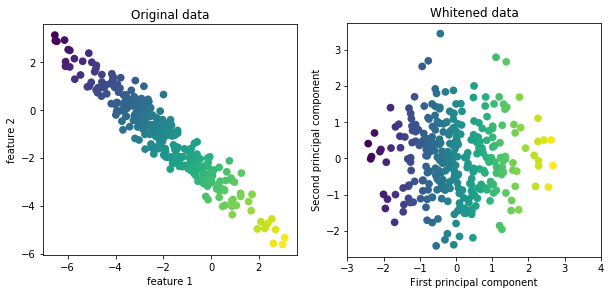

In [25]:
mglearn.plots.plot_pca_whitening()

In [36]:
pca = PCA(n_components = 100, whiten = True, random_state = 0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print ('X_train_pca.shape :{}'.format(X_train_pca.shape))

X_train_pca.shape :(1547, 100)


In [38]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train_pca, y_train)
print ('test set score {:.2f}'.format(knn.score(X_test_pca, y_test)))

test set score 0.31


In [40]:
print ('pca.components_.shape {}'.formmat(pca.components_.shape))

pca.components_.shape (100, 5655)


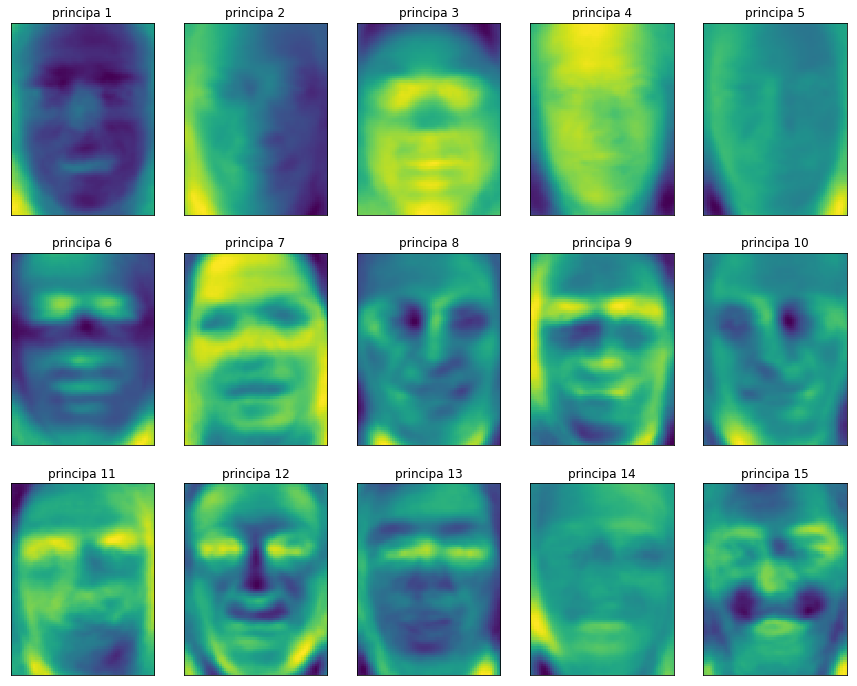

In [43]:
fig, axes = plt.subplots(3,5, figsize = (15,12), subplot_kw = {'xticks' :(), 'yticks': ()})

for i , (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap = 'viridis')
    ax.set_title('principa {}'.format((i+1)))

________________________________________________________________________________
[Memory] Calling mglearn.plot_pca.pca_faces...
pca_faces(array([[ 0.535948, ...,  0.243137],
       ..., 
       [ 0.043137, ...,  0.596078]], dtype=float32), 
array([[ 0.237908, ...,  0.269281],
       ..., 
       [ 0.4     , ...,  0.254902]], dtype=float32))
_______________________________________________________pca_faces - 11.5s, 0.2min


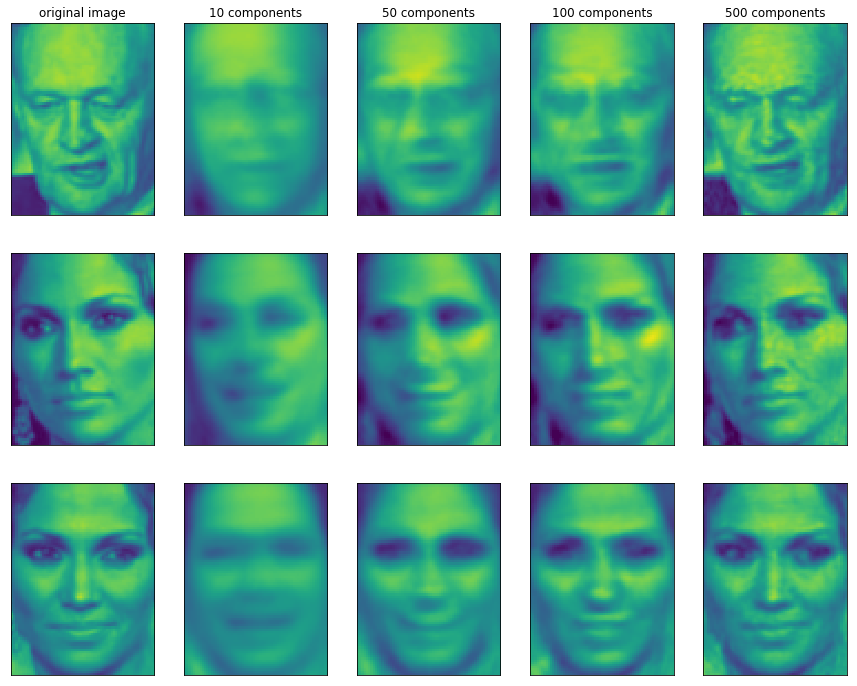

In [44]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

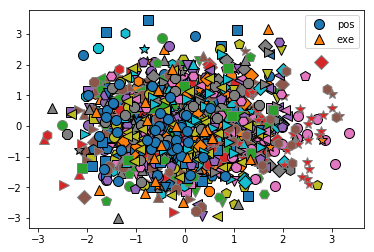

In [48]:
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.legend(['pos', 'exe'], loc = 'best')